In [1]:
import tweepy 
import pandas as pd 
import numpy as np 
import IPython.display  
import matplotlib.pyplot as plt 
import seaborn as sns 
from textblob import TextBlob 
import re 
import warnings 
warnings.filterwarnings('ignore') 
%matplotlib inline 

In [2]:
consumer_key = "CQjUb4hmT9HBE75VRSwQWUeGx"  
consumer_secret = "tKhmId9LyP2CeskXjMNXYmw8zD7VUHKJqIywOjD6KhlsniNsfR"  
access_key = "2987993588-I1tLjIPuAE9iEPvVYBbHhq9JPfCNPi5SA1JqMEe"  
access_secret = "FrRDtxEdosOeCoAKxVoxCaSou0CuOwL7qtrChrKmGo7N3"

In [3]:
def twitter_setup(): 
 auth=tweepy.OAuthHandler(consumer_key, consumer_secret) 
 auth.set_access_token(access_key, access_secret) 
 api = tweepy.API(auth) 
 return api 

In [43]:
screen_name="ISRO" 
#function to egt all tweets
def get_all_tweets(screen_name):
  auth=tweepy.OAuthHandler(consumer_key, consumer_secret) 
  auth.set_access_token(access_key, access_secret) 
  api=tweepy.API(auth,proxy="https://172.31.2.4:8080") 
  api=tweepy.API(auth) 
  

  tweets = [] 
    
  new_tweets=api.user_timeline(screen_name=screen_name, count=200) 
  tweets.extend(new_tweets) 

  oldest = 1179759346189602815 

  while len(new_tweets)>0: 
    print(f"Getting tweets before {oldest}")   
    new_tweets=api.user_timeline(screen_name=screen_name, count=20, max_id=oldest)  
    tweets.extend(new_tweets) 
    oldest=tweets[-1].id-1 
    print(f"Number of Tweets have been downloaded so far: {len(tweets)}")
    if(len(tweets) == 15):
      break;
  return tweets 

tweets=get_all_tweets(screen_name) 
print("15 recent Tweets") 
for i in range(15):
  print(tweets[i].text, end="\n")


Getting tweets before 1179759346189602815
Number of Tweets have been downloaded so far: 220
Getting tweets before 1170101772397862911
Number of Tweets have been downloaded so far: 240
Getting tweets before 1168150606235570181
Number of Tweets have been downloaded so far: 260
Getting tweets before 1163638230693994495
Number of Tweets have been downloaded so far: 280
Getting tweets before 1157998937774514175
Number of Tweets have been downloaded so far: 300
Getting tweets before 1153525427773689855
Number of Tweets have been downloaded so far: 320
Getting tweets before 1153251700251119615
Number of Tweets have been downloaded so far: 340
Getting tweets before 1151828057449099263
Number of Tweets have been downloaded so far: 360
Getting tweets before 1150256792040984578
Number of Tweets have been downloaded so far: 380
Getting tweets before 1148941189606809599
Number of Tweets have been downloaded so far: 400
Getting tweets before 1135512238414938114
Number of Tweets have been downloaded 

In [23]:
data=pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets']) 
display(data.head(10)) 

,Tweets
0,An interactive online workshop on “Scientific ...
1,"For the first time in the country, ISRO has su..."
2,"Dr. K. Sivan, Chairman, ISRO / Secretary, DOS ..."
3,Join us LIVE on 19 March 2021 at 2:30 pm for t...
4,Bilateral meeting @isro and Saudi Space Commis...
5,RT @DDNewslive: Watch #IndiaIdeas with @grrroy...
6,Launch of sounding rocket (RH-560) to study at...
7,"A Press Meet was organised today, March 12, 20..."
8,Bilateral meeting between ISRO and @JAXA_en w...
9,NewSpace India Limited (#NSIL) is organizing a...


In [24]:
print(dir(tweets[0])) 

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [25]:
data={'Tweets':[tweet.text for tweet in tweets], 
          'ID':[tweet.id_str for tweet in tweets],
      'Date':[tweet._json['created_at'] for tweet in tweets],
      'Source':[tweet.source for tweet in tweets],
      'Likes':[tweet.favorite_count for tweet in tweets],
      'RTs':[tweet.retweet_count for tweet in tweets],}
data=pd.DataFrame(data=data) 
display(data.head(10)) 

,Tweets,ID,Date,Source,Likes,RTs
0,An interactive online workshop on “Scientific ...,1377238713571237891,Wed Mar 31 12:37:51 +0000 2021,Twitter Web App,2598,206
1,"For the first time in the country, ISRO has su...",1374007228328419330,Mon Mar 22 14:37:05 +0000 2021,Twitter Web App,12935,2366
2,"Dr. K. Sivan, Chairman, ISRO / Secretary, DOS ...",1372585900736008192,Thu Mar 18 16:29:14 +0000 2021,Twitter Web App,4215,417
3,Join us LIVE on 19 March 2021 at 2:30 pm for t...,1372517773457330183,Thu Mar 18 11:58:31 +0000 2021,Twitter Web App,1834,205
4,Bilateral meeting @isro and Saudi Space Commis...,1372424608788348928,Thu Mar 18 05:48:19 +0000 2021,Twitter Web App,3861,490
5,RT @DDNewslive: Watch #IndiaIdeas with @grrroy...,1372423326958645253,Thu Mar 18 05:43:14 +0000 2021,Twitter Web App,0,81
6,Launch of sounding rocket (RH-560) to study at...,1370399457833971713,Fri Mar 12 15:41:06 +0000 2021,Twitter Web App,13210,1668
7,"A Press Meet was organised today, March 12, 20...",1370396659360788483,Fri Mar 12 15:29:58 +0000 2021,Twitter Web App,2537,229
8,Bilateral meeting between ISRO and @JAXA_en w...,1369934247423737860,Thu Mar 11 08:52:31 +0000 2021,Twitter Web App,4985,502
9,NewSpace India Limited (#NSIL) is organizing a...,1369252982005579777,Tue Mar 09 11:45:25 +0000 2021,Twitter Web App,6664,632


In [26]:
lik_max=np.max(data['Likes']) 
rt_max=np.max(data['RTs']) 
fav=data[data.Likes==lik_max].index[0] 
rt=data[data.RTs==rt_max].index[0] 
print(f"The most liked tweet is: {data['Tweets'][fav]}") 
print(f"Number of likes: {lik_max}") 
print() 
print(f"The most liked tweet is: {data['Tweets'][rt]}") 
print(f"Number of likes: {rt_max}") 
print() 

The most liked tweet is: #VikramLander has been located by the orbiter of #Chandrayaan2, but no communication with it yet. 
All possible eff… https://t.co/N90QtjUeem
Number of likes: 155016

The most liked tweet is: RT @NASA: Space is hard. We commend @ISRO’s attempt to land their #Chandrayaan2 mission on the Moon’s South Pole. You have inspired us with…
Number of likes: 54627



In [27]:
year = [tweet._json['created_at'][-4:] for tweet in tweets] 
df = {'year': year,
        'likes': [tweet.favorite_count for tweet in tweets]}
like = pd.DataFrame(data=df)

df = {'RTs':[tweet.retweet_count for tweet in tweets],
        'year':year}
retweet = pd.DataFrame(data=df)

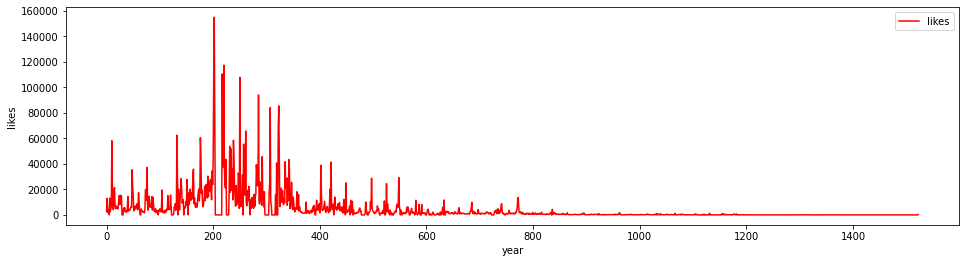

In [28]:
like.plot(figsize=(16,4), color='r')
plt.xlabel('year')
plt.ylabel('likes')
plt.xscale('linear')

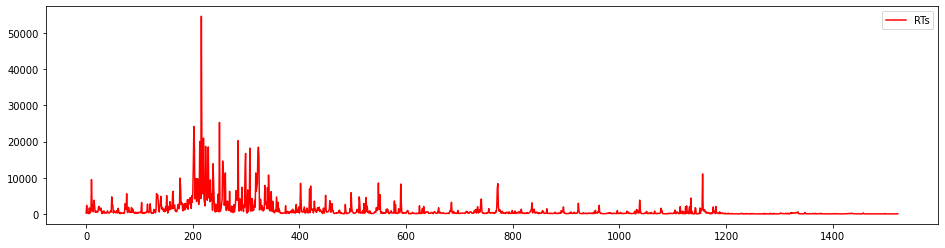

In [29]:
retweet.plot(figsize=(16,4), color='r')

In [31]:
data.isnull().any() 

Tweets    False
ID        False
Date      False
Source    False
Likes     False
RTs       False
dtype: bool

In [32]:
data.describe()

,Likes,RTs
count,1523.000000,1523.000000
mean,4464.145108,1087.235062
std,11515.936704,2828.250805
min,0.000000,0.000000
25%,27.000000,105.500000
50%,494.000000,251.000000
75%,3608.500000,815.000000
max,155016.000000,54627.000000


In [33]:
data['Tweets_Cln']=data.Tweets.str.replace(r'http\S+', '').str.replace(r'@\S+', '').str.replace('&amp', '')
data=data[data.Likes!=0] 

In [34]:
data.head(2)

,Tweets,ID,Date,Source,Likes,RTs,Tweets_Cln
0,An interactive online workshop on “Scientific ...,1377238713571237891,Wed Mar 31 12:37:51 +0000 2021,Twitter Web App,2598,206,An interactive online workshop on “Scientific ...
1,"For the first time in the country, ISRO has su...",1374007228328419330,Mon Mar 22 14:37:05 +0000 2021,Twitter Web App,12935,2366,"For the first time in the country, ISRO has su..."


,Tweets,ID,Date,Source,Likes,RTs,Tweets_Cln,sentiment
0,An interactive online workshop on “Scientific ...,1377238713571237891,Wed Mar 31 12:37:51 +0000 2021,Twitter Web App,2598,206,An interactive online workshop on “Scientific ...,0
1,"For the first time in the country, ISRO has su...",1374007228328419330,Mon Mar 22 14:37:05 +0000 2021,Twitter Web App,12935,2366,"For the first time in the country, ISRO has su...",1


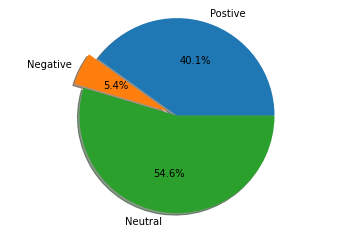

In [35]:
def analize_sentiment(tweet):
  analysis = TextBlob(tweet) 
  if analysis.sentiment.polarity > 0: 
    return 1 
  elif analysis.sentiment.polarity == 0: 
    return 0 
  else: 
    return -1 

data['sentiment'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets_Cln']]) 
display(data.head(2)) 

positive = data['sentiment'].to_list().count(1)
negative = data['sentiment'].to_list().count(-1)
neutral = data['sentiment'].to_list().count(0)

#Let's plot 
labels='Postive', 'Negative', 'Neutral' 
sizes=[positive, negative, neutral] 
explode=(0, 0.1, 0) 
fig1, ax1 = plt.subplots() 
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', 
 shadow=True, startangle=0) 
ax1.axis('equal') 
plt.show()

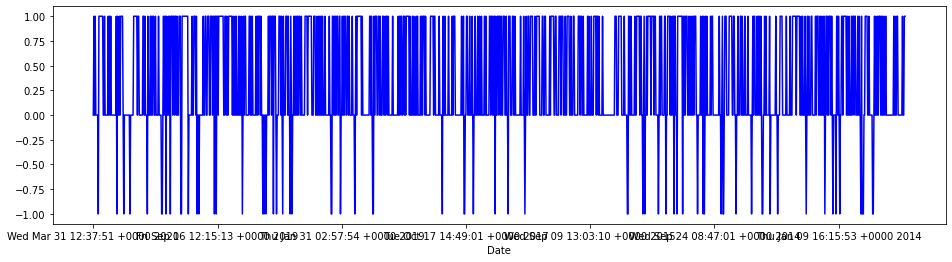

In [36]:
tsen=pd.Series(data=data['sentiment'].values, index=data['Date']) 
tsen.plot(figsize=(16,4), color='b') 

In [37]:
IND_count = data.Tweets[data.Tweets.str.contains('ISRO', flags=re.IGNORECASE)].count() 
print(f"ISRO has tweeted about {IND_count} times.") 
print() 
data.Tweets[data.Tweets.str.contains('IND', flags=re.IGNORECASE)] 

ISRO has tweeted about 376 times.



3       Join us LIVE on 19 March 2021 at 2:30 pm for t...
6       Launch of sounding rocket (RH-560) to study at...
7       A Press Meet was organised today, March 12, 20...
9       NewSpace India Limited (#NSIL) is organizing a...
38      Confederation of Indian Industry in associatio...
                              ...                        
1480    Cryogenically speaking, ice is hot ! Unveiling...
1484    Interesting details about the GSLV D5,schedule...
1487    The cynosure of all eyes,Indigenous Cryogenic ...
1510    Geosynchronous Satellite Launch Vehicle (GSLV ...
1522    Bigger &amp; Better !\nWe are here to bring yo...
Name: Tweets, Length: 139, dtype: object

In [38]:
from wordcloud import WordCloud, STOPWORDS

In [39]:
comment_words = ''

for val in data['Tweets_Cln']:
  val = str(val)

  tokens = val.split()
    
  for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()
    
  comment_words += " ".join(tokens)+" "

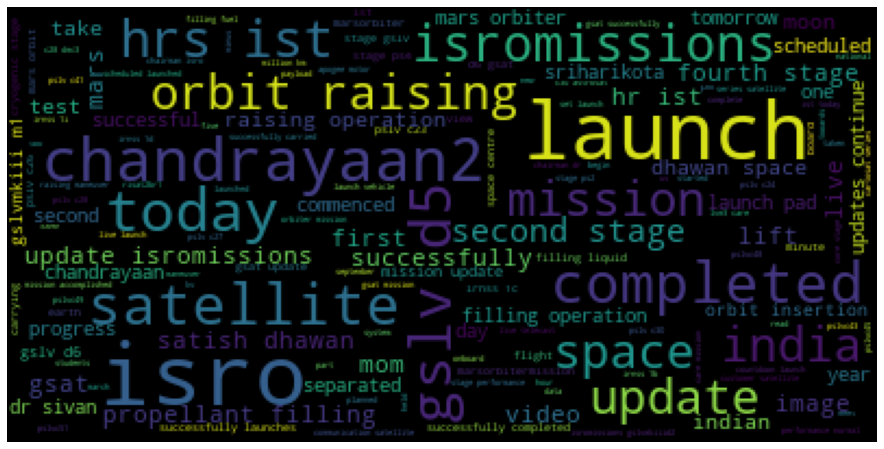

In [40]:
stopwords = set(STOPWORDS) 
stopwords.add("will") 
stopwords.update(["say","said", "let", "now", "go", "Ji", "many", "Dear", "Shri", "watch"]) 
wordcloud_hc = WordCloud(max_font_size=40, relative_scaling=.5,stopwords=stopwords, background_color="black").generate(comment_words)
plt.figure(figsize=[16,8]) 
plt.imshow(wordcloud_hc) 
plt.axis("off") 
plt.show()